# Implemrnting Logistic Regression from Scratch

Import libraries

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from scipy import optimize

## Function Implementation

In [59]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

def add_const(X: pd.DataFrame):
    X['const'] = 1
    return X

def predict(parameters, X):
    y_pred = sigmoid(np.dot(X, parameters))
    return y_pred

class Logistic_Reg():
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.params = np.zeros((X.shape[1]), dtype=float)
        # self.params = np.random.normal(size=X.shape[1], scale=0.1)
        self.optimize_rec = []

    def log_likelihood(self, parameters):
        y_pred = sigmoid(np.dot(self.X, parameters))
        log_l = self.Y * np.log(y_pred) + (1 - self.Y) * np.log(1 - y_pred)
        return np.sum(log_l) * -1
        

    def fit(self):
        parmeters = self.params
        parmeters = optimize.minimize(self.log_likelihood, parmeters, method='BFGS')
        self.params = parmeters.x
        self.optimize_rec = parmeters
        return

    def pred(self):
        Y_pred = predict(self.params, self.X)
        return Y_pred

Load Data

In [60]:
# dat_dir = './'

github_url = 'https://raw.githubusercontent.com/huangyh09/foundation-data-science/'
dat_dir = github_url + 'main/assignments/'

df_lr = pd.read_csv(dat_dir + "stroke_data.csv", index_col=0)

In [61]:
df_lr.head()

,is_female,age,hypertension,heart_disease,ever_married,Rural_residence,avg_glucose_level,bmi,smoking,stroke
id,,,,,,,,,,
24201,0,33.0,0,0,1,1,93.80,23.9,0,0
70031,1,71.0,1,0,1,1,195.25,33.3,0,0
17013,0,78.0,1,0,0,0,113.01,24.0,0,1
67890,0,77.0,0,1,1,0,102.96,20.9,0,0
38078,1,82.0,1,1,1,0,73.19,33.5,0,0


In [62]:
X = df_lr[df_lr.columns[:-1]]
Y = df_lr[df_lr.columns[-1]]

In [63]:
X = add_const(X)
model_t = Logistic_Reg(X.values, Y.values)
X.head()

,is_female,age,hypertension,heart_disease,ever_married,Rural_residence,avg_glucose_level,bmi,smoking,const
id,,,,,,,,,,
24201,0,33.0,0,0,1,1,93.80,23.9,0,1
70031,1,71.0,1,0,1,1,195.25,33.3,0,1
17013,0,78.0,1,0,0,0,113.01,24.0,0,1
67890,0,77.0,0,1,1,0,102.96,20.9,0,1
38078,1,82.0,1,1,1,0,73.19,33.5,0,1


In [64]:
model_t.fit()

In [65]:
print(model_t.optimize_rec)

      fun: 357.34738555554156
 hess_inv: array([[ 3.91555163e-02,  7.29082314e-05,  2.34044642e-03,
         3.72164963e-03,  1.88474167e-02,  1.40336895e-03,
         9.26132797e-05, -3.38180657e-04,  4.71671266e-03,
        -4.80531730e-02],
       [ 7.29082314e-05,  2.73173140e-05,  2.59195841e-04,
         1.85702982e-04,  2.68078231e-04,  2.09639647e-04,
        -1.45272280e-06, -3.07732188e-05,  2.95865642e-04,
        -1.10511985e-03],
       [ 2.34044642e-03,  2.59195841e-04,  4.32685876e-02,
        -1.04383772e-02,  5.14101788e-03,  1.78789933e-05,
         1.41574717e-06,  2.73013679e-04,  4.26813872e-03,
        -4.18081023e-02],
       [ 3.72164963e-03,  1.85702982e-04, -1.04383772e-02,
         6.51831792e-02, -1.52717157e-02, -1.22124050e-03,
        -9.16871811e-05,  1.40739452e-03, -4.76637674e-03,
        -3.92291851e-02],
       [ 1.88474167e-02,  2.68078231e-04,  5.14101788e-03,
        -1.52717157e-02,  1.54467501e-01,  3.66500586e-03,
         2.06730626e-04, -1.1

In [66]:
print(model_t.log_likelihood(model_t.params))

357.34738555554156


In [67]:
print(model_t.pred())

[0.01776931 0.48362452 0.5402927  0.4095137  0.62834444 0.01850177
 0.00570018 0.00903678 0.46621387 0.48908889 0.017891   0.21195647
 0.48725465 0.46387763 0.13703355 0.1689417  0.22313343 0.18416213
 0.04502192 0.09516575 0.46186565 0.43324918 0.11771296 0.03341187
 0.01948523 0.30210245 0.07150844 0.06873975 0.02208446 0.04781462
 0.03947572 0.18976382 0.08637709 0.44422391 0.43790169 0.01486564
 0.15464887 0.28996157 0.66202109 0.24662988 0.10962799 0.51492394
 0.07502148 0.08346514 0.41529323 0.4703581  0.08065089 0.02282645
 0.10925913 0.49588015 0.0113826  0.29395049 0.20814556 0.57447078
 0.0132426  0.11677215 0.09322124 0.01521255 0.02238265 0.0549615
 0.0201391  0.03346879 0.63374159 0.24796246 0.48180595 0.66425259
 0.18831015 0.42363771 0.21271269 0.01388133 0.7816034  0.23481028
 0.48328679 0.05031678 0.01312179 0.29289988 0.24924001 0.25625568
 0.02850087 0.05714039 0.03698489 0.01462586 0.03996885 0.00943035
 0.40999589 0.02380058 0.0400796  0.00460513 0.59120514 0.47409

## sklearn

In [68]:
from sklearn.linear_model import LogisticRegression

model_sk = LogisticRegression().fit(X, Y)
print(model_sk.coef_)
print(model_t.params)

[[ 6.61724176e-02  7.14594239e-02  3.83358587e-01  2.30303172e-01
  -2.70537499e-01 -2.24349174e-02  4.40739044e-03  1.32447120e-03
   4.18715650e-01 -2.84735793e+00]]
[ 1.21935798e-01  7.59882032e-02  4.01783501e-01  3.14275738e-01
 -2.90528568e-01  2.35010632e-02  4.40669744e-03  9.41461334e-03
  5.30368874e-01 -6.89129388e+00]


/Users/qiaojiamu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [69]:
Y_pred_sk = pd.DataFrame(data=model_sk.predict_proba(X))
log_likelihood_sk = np.dot(Y, np.log(Y_pred_sk)) + np.dot((1 - Y), np.log(1 - Y_pred_sk))
print(log_likelihood_sk)
print(model_sk.score(X, Y))

[-2122.90261993  -357.85170201]
0.8214285714285714


In [70]:
print(Y_pred_sk.head())

          0         1
0  0.976953  0.023047
1  0.530542  0.469458
2  0.442773  0.557227
3  0.577749  0.422251
4  0.406424  0.593576


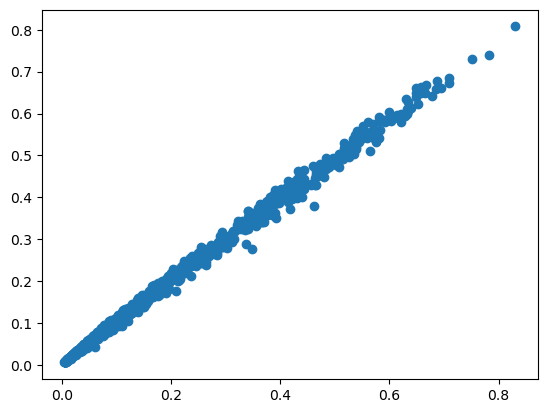

In [71]:
plt.scatter(model_t.pred(), Y_pred_sk[1])